In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.pipeline import Pipeline

# Load

In [65]:
df_original = pd.read_csv("HW3_movie_metadata.csv")
df = df_original.copy()

In [66]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [67]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [69]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross       genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget      title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.0                   87.0      0.0                      548.0                   Ewen Bremner         22000.0                 8579684.0   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.0                   end credits roll call|four word title|funeral|secret|uncle         http://www.imd

In [70]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [71]:
# # Set the style of seaborn for better aesthetics
# sns.set(style="whitegrid")

# # Get the number of numerical columns and decide the number of columns in the grid
# num_cols = df.select_dtypes(include='number').columns
# num_plots = len(num_cols)

# # Set the number of columns in the grid (you can adjust this based on your preference)
# num_cols_in_grid = 6

# # Calculate the number of rows needed
# num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# # Increase the height of each subplot by adjusting the figsize parameter
# fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(50, 20))  # Adjust the figure size as needed

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through each numerical column and plot histogram with KDE on a separate subplot
# for i, column in enumerate(num_cols):
#     sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
#     axes[i].set_title(f'Histogram with KDE for {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# # Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
# for j in range(num_plots, len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout for better spacing
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

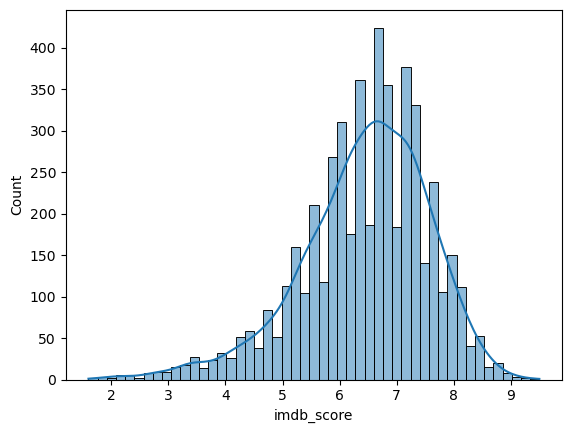

In [72]:
# Distribution of the data
sns.histplot(df["imdb_score"], kde=True)

# Preprocessing

Cut the middle part of the data to avoid the ambiguity between low and high and use median as the boundary

Choose to cut percentile 40-60

In [73]:
median = df.imdb_score.median()
print("median =", median)

median = 6.6


In [74]:
# Calculate the 40th and 60th percentiles of the 'imdb_score' column
percentile_40 = df['imdb_score'].quantile(0.4)
percentile_60 = df['imdb_score'].quantile(0.6)

# Create a mask to select rows outside the 40-60 percentile range
mask = (df['imdb_score'] < percentile_40) | (df['imdb_score'] > percentile_60)

# Use the mask to drop the selected rows
df_cut = df[mask]

df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5036,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84


Add new binary column call "label" with 1 = high score, 0 = low score

In [75]:
df_cut['label'] = np.where(df_cut['imdb_score'] < median, 0.0, 1.0)
df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.0
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,1.0
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,1.0
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,1.0
5036,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,...,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4,1.0
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,1.0


In [76]:
df_cut[["label", "imdb_score"]]

,label,imdb_score
0,1.0,7.9
1,1.0,7.1
3,1.0,8.5
4,1.0,7.1
6,0.0,6.2
...,...,...
5033,1.0,7.0
5035,1.0,6.9
5036,1.0,7.8
5038,1.0,7.7


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

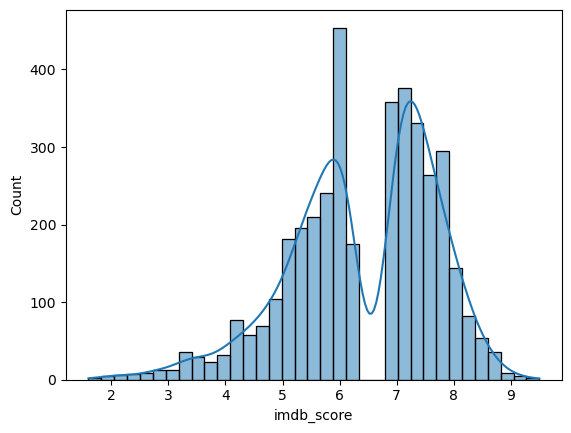

In [77]:
sns.histplot(df_cut["imdb_score"], kde=True)

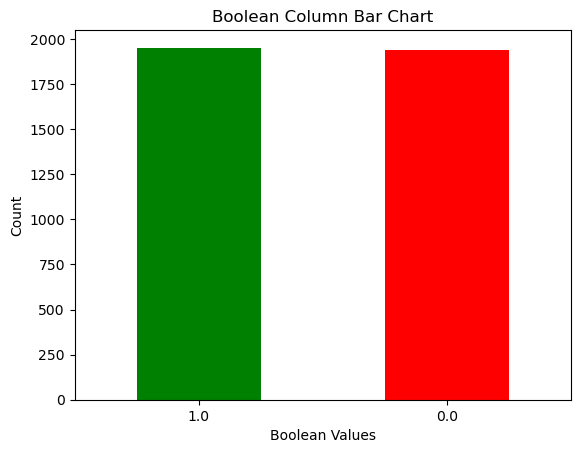

In [78]:
# Count the occurrences of each boolean value in the 'BooleanColumn'
counts = df_cut['label'].value_counts()

# Plot a bar chart
counts.plot(kind='bar', color=['green', 'red'], rot=0)

# Add labels and title
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.title('Boolean Column Bar Chart')

# Show the plot
plt.show()

Drop imdb_score column

In [79]:
df_cut.drop(columns=["imdb_score"],inplace=True)

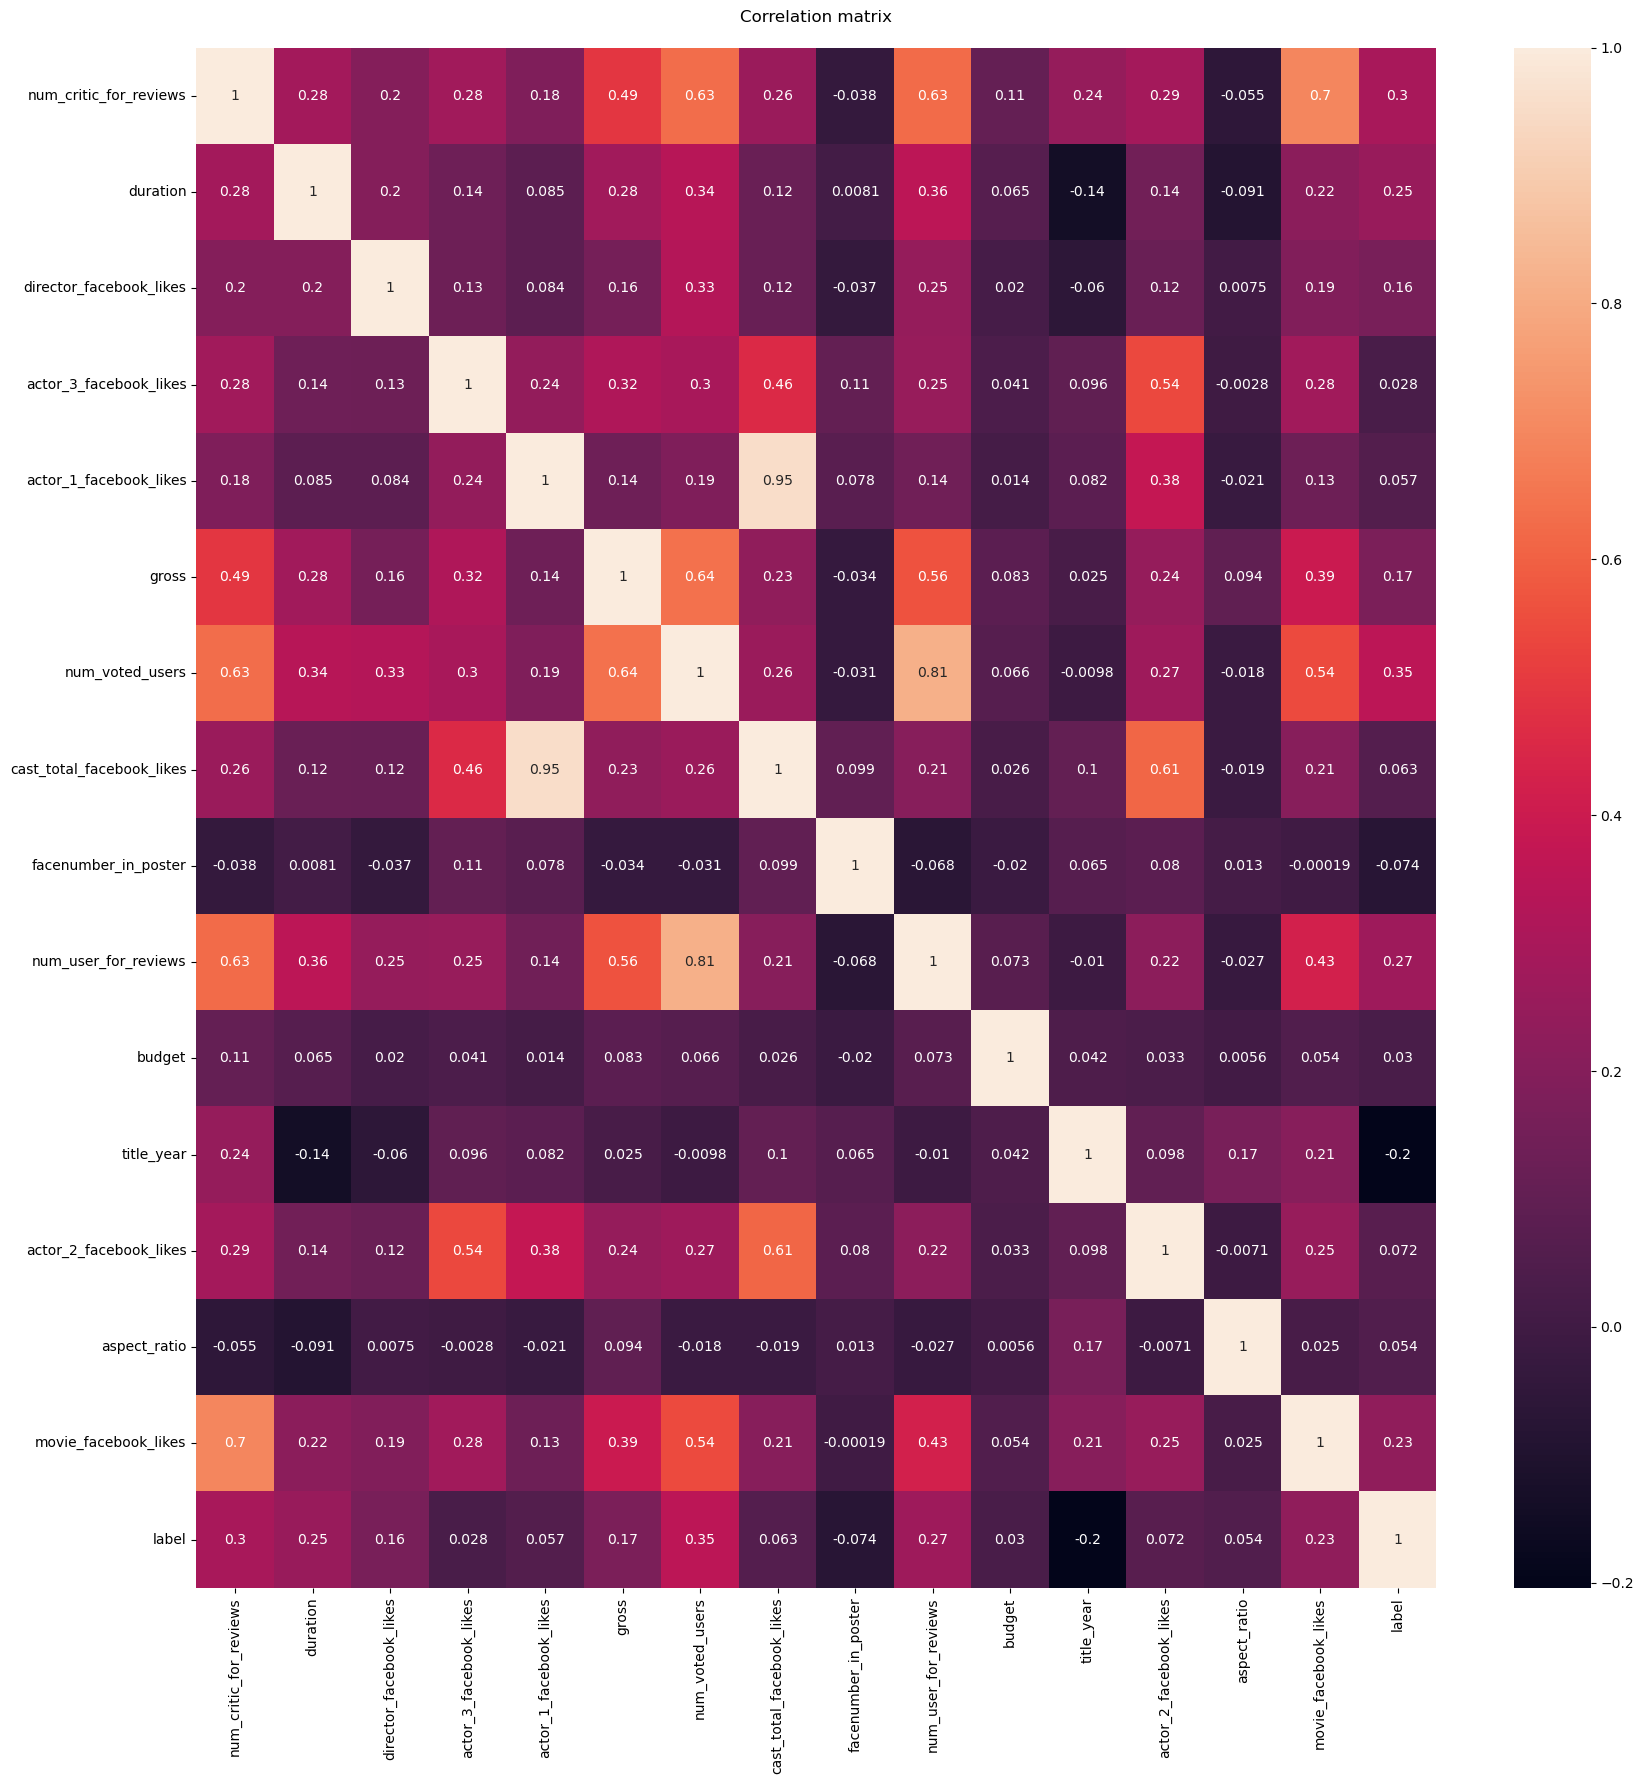

In [80]:
corr = df_cut.corr()
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

In [81]:
# Set the target column
target_column = 'label'

# Set the correlation threshold
correlation_threshold = 0.2

# Calculate the correlation between features and the target column
correlation_with_target = df_cut.corr()[target_column]

# Find columns with correlation below the threshold
columns_to_drop = [col for col in correlation_with_target.index if abs(correlation_with_target[col]) < correlation_threshold]
print(columns_to_drop)

df2 = df_cut.drop(columns=columns_to_drop)
df2.T

['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'aspect_ratio']


,0,1,3,4,6,7,8,9,10,11,...,5026,5027,5029,5030,5031,5033,5035,5036,5038,5039
director_name,James Cameron,Gore Verbinski,Christopher Nolan,Doug Walker,Sam Raimi,Nathan Greno,Joss Whedon,David Yates,Zack Snyder,Bryan Singer,...,Olivier Assayas,Jafar Panahi,Kiyoshi Kurosawa,Tadeo Garcia,Thomas L. Phillips,Shane Carruth,Robert Rodriguez,Anthony Vallone,Scott Smith,NaN
num_critic_for_reviews,723.0,302.0,813.0,NaN,392.0,324.0,635.0,375.0,673.0,434.0,...,81.0,64.0,78.0,NaN,13.0,143.0,56.0,NaN,1.0,43.0
duration,178.0,169.0,164.0,NaN,156.0,100.0,141.0,153.0,183.0,169.0,...,110.0,90.0,111.0,84.0,82.0,77.0,81.0,84.0,87.0,43.0
actor_2_name,Joel David Moore,Orlando Bloom,Christian Bale,Rob Walker,James Franco,Donna Murphy,Robert Downey Jr.,Daniel Radcliffe,Lauren Cohan,Marlon Brando,...,Béatrice Dalle,Nargess Mamizadeh,Anna Nakagawa,Michael Cortez,Joe Coffey,David Sullivan,Peter Marquardt,John Considine,Daphne Zuniga,Valorie Curry
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Thriller,Documentary,Action|Adventure|Romance,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Action|Adventure|Sci-Fi,Adventure|Family|Fantasy|Mystery,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,...,Drama|Music|Romance,Drama,Crime|Horror|Mystery|Thriller,Drama,Comedy|Horror|Thriller,Drama|Sci-Fi|Thriller,Action|Crime|Drama|Romance|Thriller,Crime|Drama,Comedy|Drama,Crime|Drama|Mystery|Thriller
actor_1_name,CCH Pounder,Johnny Depp,Tom Hardy,Doug Walker,J.K. Simmons,Brad Garrett,Chris Hemsworth,Alan Rickman,Henry Cavill,Kevin Spacey,...,Maggie Cheung,Fereshteh Sadre Orafaiy,Kôji Yakusho,Tatiana Suarez-Pico,Julianna Pitt,Shane Carruth,Carlos Gallardo,Richard Jewell,Eric Mabius,Natalie Zea
movie_title,Avatar,Pirates of the Caribbean: At World's End,The Dark Knight Rises,Star Wars: Episode VII - The Force Awakens ...,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,...,Clean,The Circle,The Cure,On the Downlow,Sanctuary; Quite a Conundrum,Primer,El Mariachi,The Mongol King,Signed Sealed Delivered,The Following
num_voted_users,886204,471220,1144337,8,383056,294810,462669,321795,371639,240396,...,3924,4555,6318,156,133,72639,52055,36,629,73839
actor_3_name,Wes Studi,Jack Davenport,Joseph Gordon-Levitt,NaN,Kirsten Dunst,M.C. Gainey,Scarlett Johansson,Rupert Grint,Alan D. Purwin,Frank Langella,...,Don McKellar,Mojgan Faramarzi,Denden,Eric Ambriz,John Lucas,Casey Gooden,Consuelo Gómez,Sara Stepnicka,Crystal Lowe,Sam Underwood
plot_keywords,avatar|future|marine|native|paraplegic,goddess|marriage ceremony|marriage proposal|pi...,deception|imprisonment|lawlessness|police offi...,NaN,sandman|spider man|symbiote|venom|villain,17th century|based on fairy tale|disney|flower...,artificial intelligence|based on comic book|ca...,blood|book|love|potion|professor,based on comic book|batman|sequel to a reboot|...,crystal|epic|lex luthor|lois lane|return to earth,...,jail|junkie|money|motel|singer,abortion|bus|hospital|prison|prostitution,breasts|interrogation|investigation|murder|wat...,gang initiation|gunplay|hazing|latino|shakespe...,nudity|party|pirate|swimsuit|three word title,changing the future|independent film|invention...,assassin|death|guitar|gun|mariachi,jewell|mongol|nostradamus|stepnicka|vallone,fraud|postal worker|prison|theft|trial,cult|fbi|hideout|prison escape|serial killer


In [82]:
unrelated_col = ["movie_imdb_link", "plot_keywords", "genres", "movie_title", "language", "title_year"]
df3 = df2.drop(columns=unrelated_col)
df3

,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_name,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,movie_facebook_likes,label
0,James Cameron,723.0,178.0,Joel David Moore,CCH Pounder,886204,Wes Studi,3054.0,USA,PG-13,33000,1.0
1,Gore Verbinski,302.0,169.0,Orlando Bloom,Johnny Depp,471220,Jack Davenport,1238.0,USA,PG-13,0,1.0
3,Christopher Nolan,813.0,164.0,Christian Bale,Tom Hardy,1144337,Joseph Gordon-Levitt,2701.0,USA,PG-13,164000,1.0
4,Doug Walker,NaN,NaN,Rob Walker,Doug Walker,8,NaN,NaN,NaN,NaN,0,1.0
6,Sam Raimi,392.0,156.0,James Franco,J.K. Simmons,383056,Kirsten Dunst,1902.0,USA,PG-13,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,77.0,David Sullivan,Shane Carruth,72639,Casey Gooden,371.0,USA,PG-13,19000,1.0
5035,Robert Rodriguez,56.0,81.0,Peter Marquardt,Carlos Gallardo,52055,Consuelo Gómez,130.0,USA,R,0,1.0
5036,Anthony Vallone,NaN,84.0,John Considine,Richard Jewell,36,Sara Stepnicka,1.0,USA,PG-13,4,1.0
5038,Scott Smith,1.0,87.0,Daphne Zuniga,Eric Mabius,629,Crystal Lowe,6.0,Canada,NaN,84,1.0


Drop the categorical columns

In [83]:
# Get the list of categorical columns
cat_cols = df3.select_dtypes(include='object').columns

# Drop the categorical columns
df4 = df3.drop(columns=cat_cols)

Encode the int columns as float

In [84]:
df4['num_voted_users'] = df4['num_voted_users'].astype('float64')

In [85]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5039
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_critic_for_reviews  3846 non-null   float64
 1   duration                3878 non-null   float64
 2   num_voted_users         3891 non-null   float64
 3   num_user_for_reviews    3872 non-null   float64
 4   movie_facebook_likes    3891 non-null   int64  
 5   label                   3891 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 341.8 KB


Drop NaN

In [86]:
df4.isna().sum()

num_critic_for_reviews    45
duration                  13
num_voted_users            0
num_user_for_reviews      19
movie_facebook_likes       0
label                      0
dtype: int64

In [87]:
df5 = df4.dropna()
df5.isna().sum()

num_critic_for_reviews    0
duration                  0
num_voted_users           0
num_user_for_reviews      0
movie_facebook_likes      0
label                     0
dtype: int64

In [88]:
print("Dataframe's entries =", len(df4), "rows")
print("Dataframe's entries after dropping NaN =", len(df5), "rows")
print("Dropped entries =", len(df4)-len(df5), "rows =>", round((len(df4)-len(df5))/len(df4)*100,2), "%")

Dataframe's entries = 3891 rows
Dataframe's entries after dropping NaN = 3837 rows
Dropped entries = 54 rows => 1.39 %


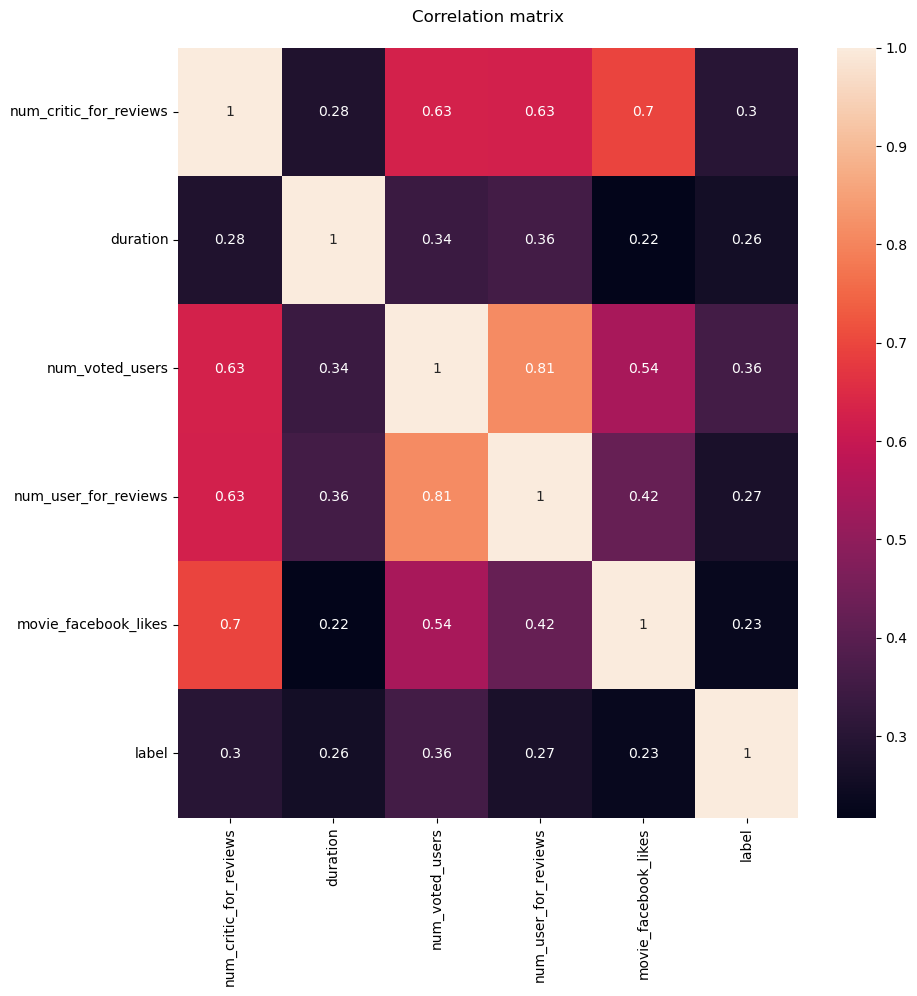

In [89]:
corr = df5.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()

num_user_for_review has high correlation with other features

In [94]:
df6 = df5.drop(columns=["num_user_for_reviews", "movie_facebook_likes"])
df6.corr()

,num_critic_for_reviews,duration,num_voted_users,label
num_critic_for_reviews,1.000000,0.282557,0.628884,0.299595
duration,0.282557,1.000000,0.339018,0.258774
num_voted_users,0.628884,0.339018,1.000000,0.357234
label,0.299595,0.258774,0.357234,1.000000


In [95]:
features = ["num_critic_for_reviews", "duration", "num_voted_users"]
y = df6.label
X = df6[features]

Scale the feature

In [96]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X[features])
X_scaled = X_scaled.add_prefix('scaled_')

X_scaled

,scaled_num_critic_for_reviews,scaled_duration,scaled_num_voted_users
0,4.647940,2.727582,5.228846
1,1.292014,2.380547,2.503964
3,5.365359,2.187750,6.923808
6,2.009433,1.879274,1.925058
7,1.467383,-0.280056,1.345614
...,...,...,...
5031,-1.011697,-0.974127,-0.589304
5033,0.024575,-1.166924,-0.113213
5035,-0.668930,-1.012686,-0.248372
5038,-1.107353,-0.781329,-0.586047


Split the data

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=100)
print("len(X_train) =", len(X_train))
print("len(X_test)  =", len(X_test))
print("len(y_train) =", len(y_train))
print("len(y_test)  =", len(y_test))

len(X_train) = 2685
len(X_test)  = 1152
len(y_train) = 2685
len(y_test)  = 1152


# Model: SVM